In [1]:
import ISS_decoding.SpaceTx_format as STX
import ISS_decoding.decoding as DEC

In [2]:
samples = [
        '/media/christoffer/hfsc_processing_2/HFSC_R1/',
        '/media/christoffer/hfsc_processing_2/HFSC_R2/',
        '/media/christoffer/hfsc_processing_2/HFSC_R3/',
        '/media/christoffer/hfsc_processing_2/HFSC_R4/',
        '/media/christoffer/hfsc_processing_2/HFSC_R5/',
        '/media/christoffer/hfsc_processing_2/HFSC_R6/',
        '/media/christoffer/hfsc_processing_2/HFSC_R7/',
        '/media/christoffer/hfsc_processing_2/HFSC_R8/'
          ]

In [2]:
for sample in samples: 
    print(sample)
    STX.make_spacetx_format_zen(path = sample,
                                                        codebook_csv = '/home/christoffer/codebook_hfsc_take2.csv',
                                                        filenames=['Base_1_stitched', 'Base_2_stitched', 
                                                                   'Base_3_stitched', 'Base_4_stitched', 
                                                                   'Base_5_stitched'],
                                                        tile_dim=4000,
                                                        pixelscale=1,
                                                        channels=["AF750", "Cy5", "Cy3", "AF488", "DAPI"],
                                                        DO_decorators=["AF750", "Cy5", "Cy3", "AF488"],
                                                        folder_spacetx='SpaceTX_format_5_cycles',
                                                        nuclei_channel=5,
                                                    )
    
    DEC.process_experiment(exp_path = sample+'/SpaceTX_format_5_cycles/experiment.json', 
                                    output = sample+'/starfish_output_spot_alignment_5_cycles/', 
                                    register = True,
                                    register_dapi = False,
                                    masking_radius = 15, 
                                    threshold = 0.002, 
                                    sigma_vals = [1, 10, 30], # min, max and number
                                    decode_mode = 'PRMC',
                                    normalization_method = 'MH' # or MD
                            )
    

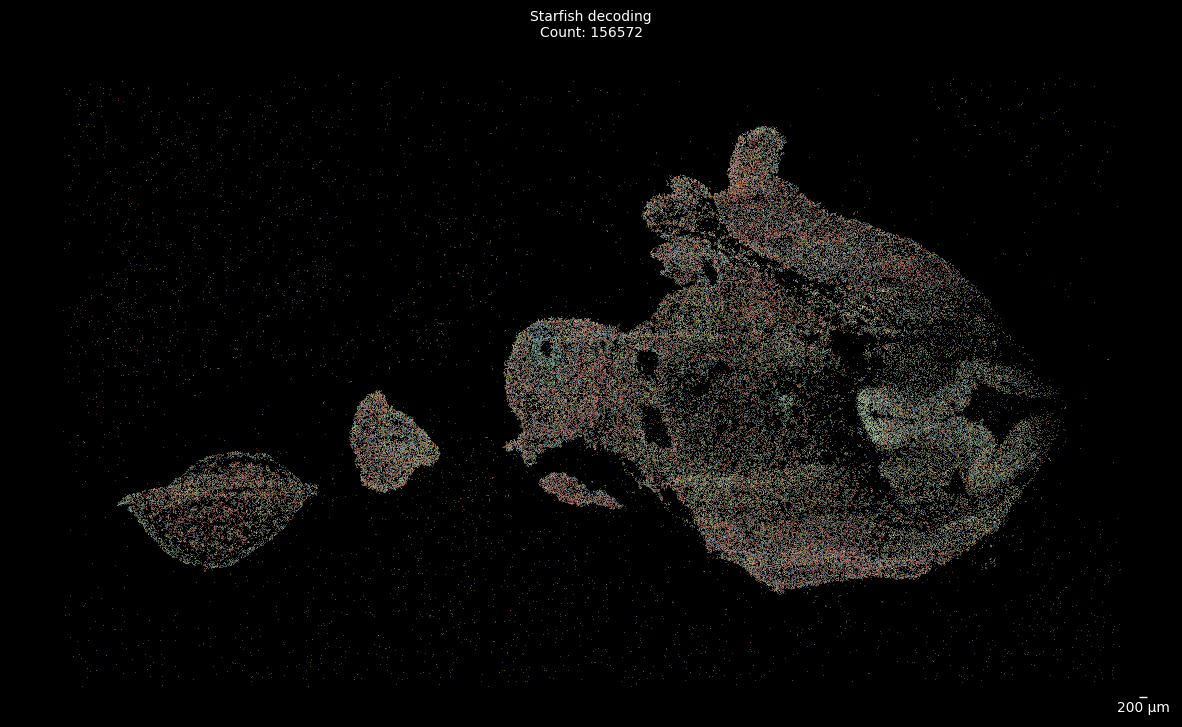

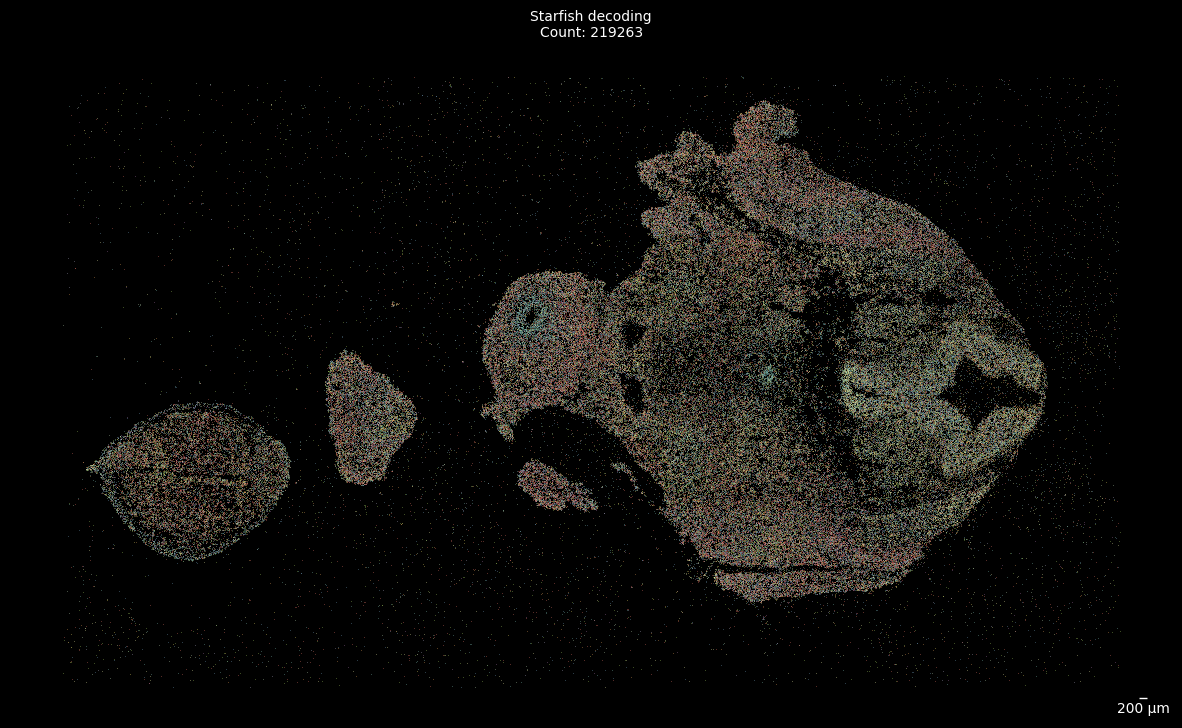

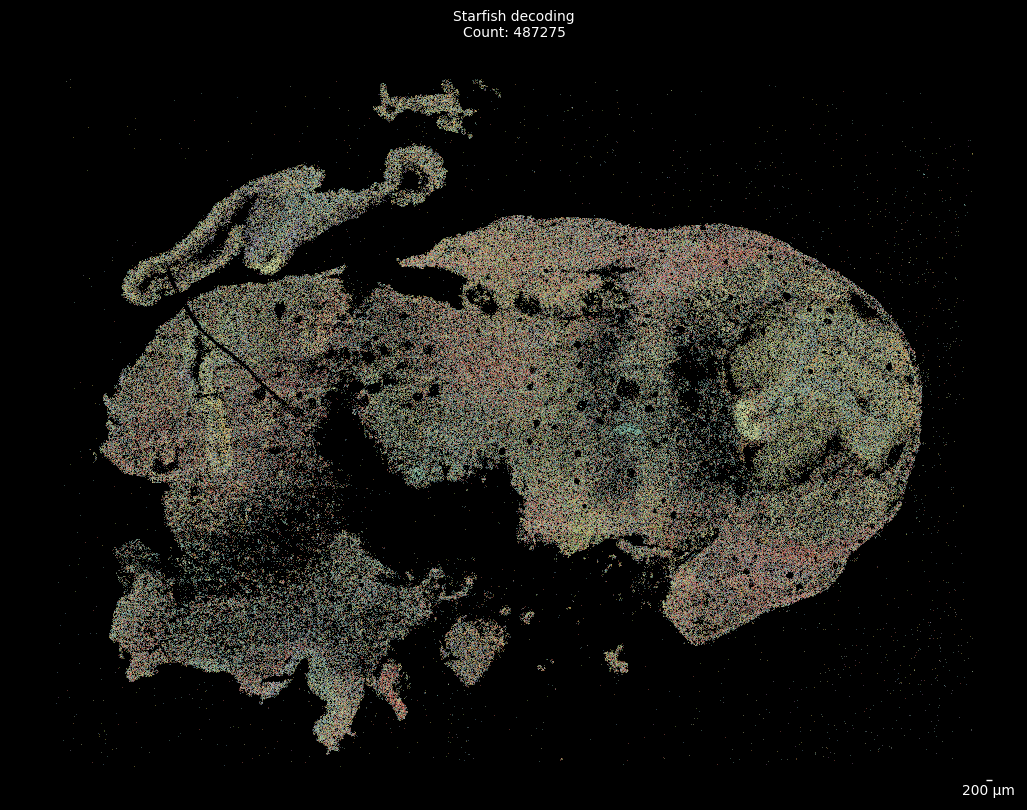

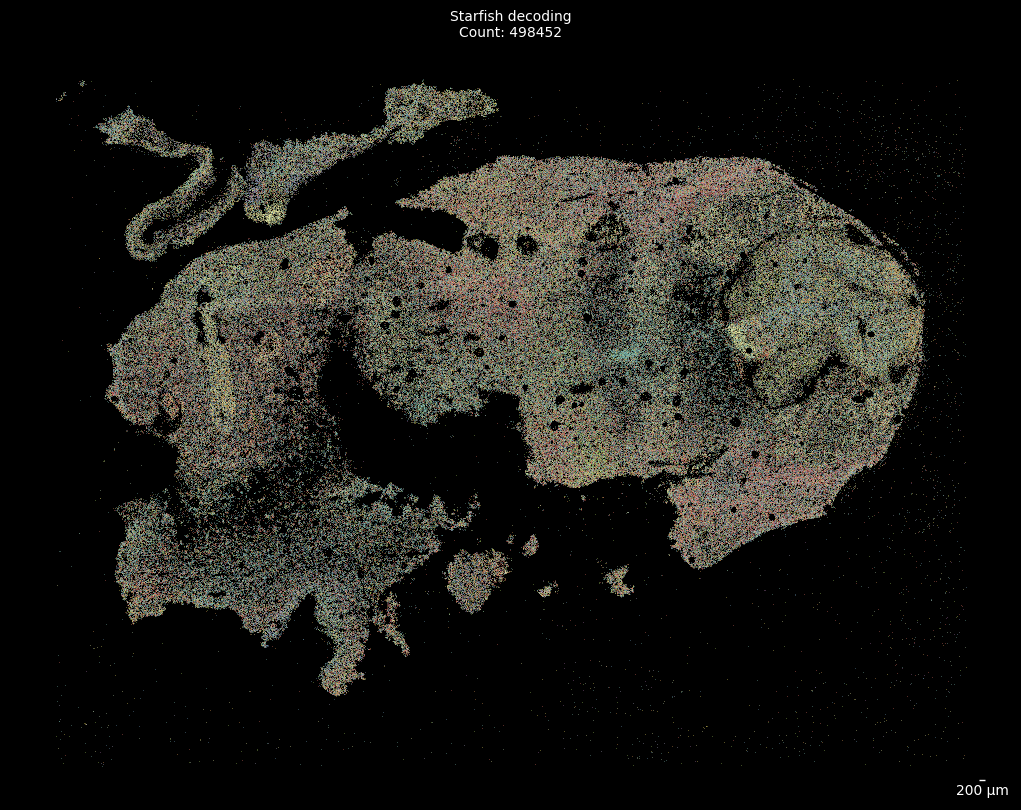

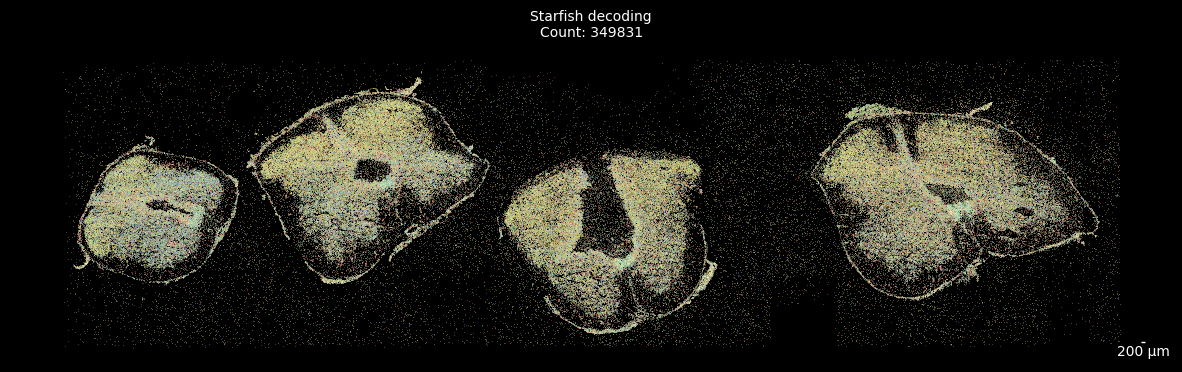

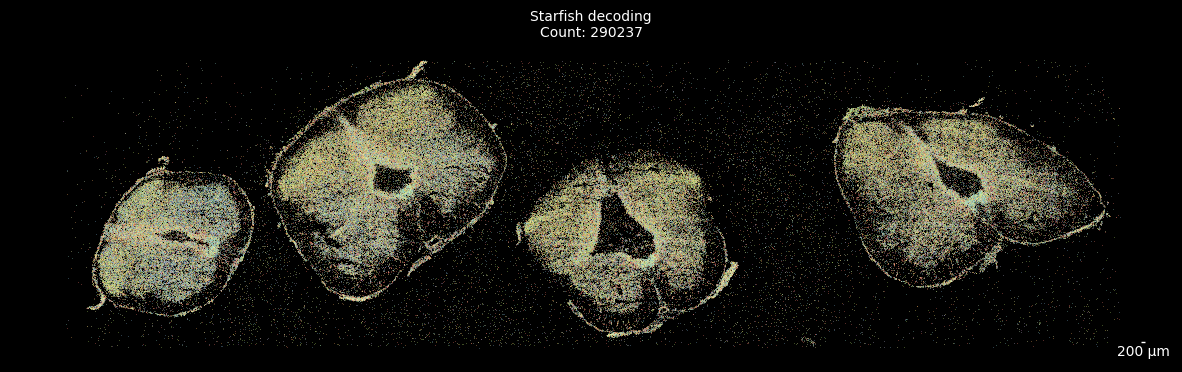

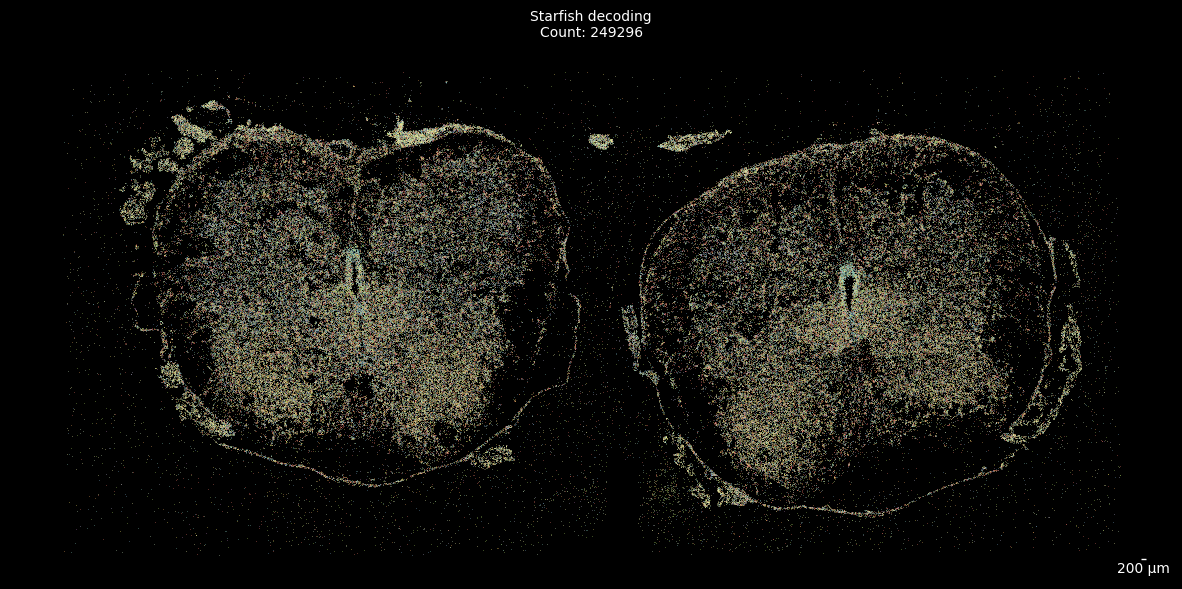

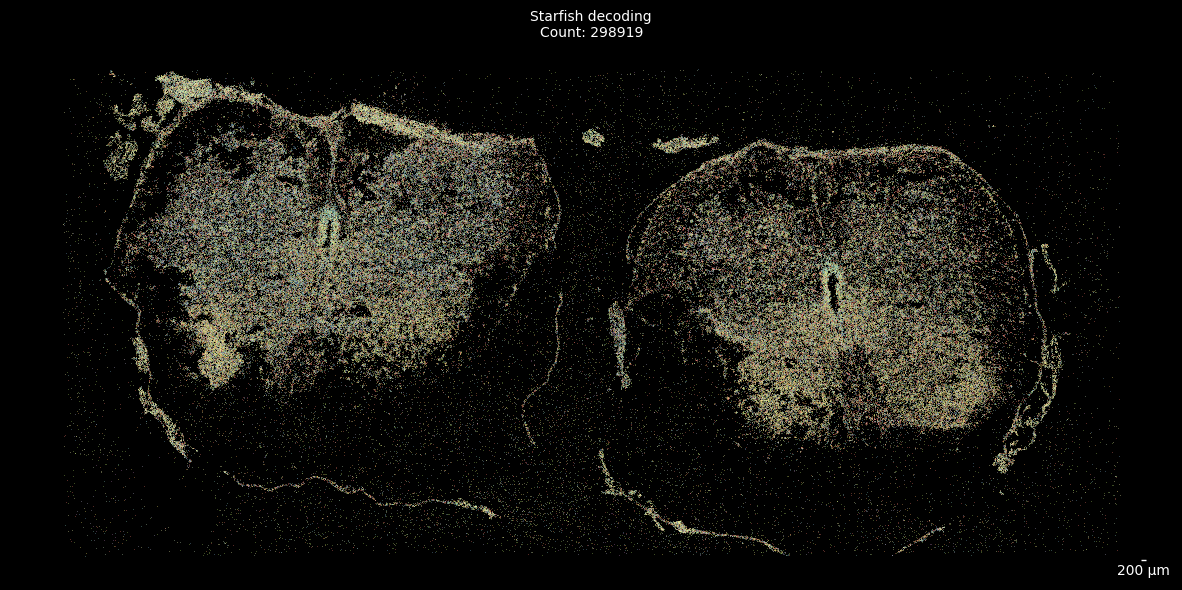

In [8]:
for sample in samples: 
    #spots, spots_filt = dec.concatenate_starfish_output(path = sample +'/starfish_output_spot_alignment/', outpath = sample ,)
    DEC.plot_starfish_output(spots_file = sample+'/decoded.csv', 
                        dpi = 100, 
                        fig_size = (15,10), 
                        conversion = 1, 
                        size_of_spots = 0.5)